In [2]:
library(DESeq2)


## followed https://bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#exploratory-analysis-and-visualization

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [3]:
counts_file <- as.matrix(read.csv("/bigdata/faustmanlab/bch/csv_files/combined_counts.csv", row.names=1,))

metadata <- read.csv("/bigdata/faustmanlab/bch/csv_files/combined_metadata.csv", colClasses=c("age_week"="character"))


In [6]:

dds_comb <- DESeqDataSetFromMatrix(countData = counts_file, 
                                colData = metadata, 
                                design = ~ age_week + strain)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [7]:
nrow(dds_comb)

[1] 30560

In [8]:
keep <- rowSums(counts(dds_comb)) > 1
dds_comb <- dds_comb[keep,]
nrow(dds_comb)

[1] 27855

In [16]:
#Row  filter if needed #

keep <- rowSums(counts(dds_comb) >= 10) >= 3
dds_comb <- dds_comb[keep,]
nrow(dds_comb)

[1] 20466

In [17]:
# Transformation
 vsd <- vst(dds_comb, blind= FALSE)

 head(assay(vsd), 10)


,SRR6396793,SRR6396794,SRR6396795,SRR6396796,SRR6396797,SRR6396798,SRR6396799,SRR6396800,SRR6396801,SRR6396802,⋯,SRR1170509,SRR1170510,SRR1170512,SRR1170511,SRR1170513,SRR1170514,SRR1170515,SRR1170516,SRR1170518,SRR1170517
ENSRNOG00000000001,4.549500,4.549916,4.228064,4.228064,4.228064,4.228064,6.327047,6.386609,6.537861,6.411839,⋯,4.879749,4.601186,5.465306,5.356449,4.974709,5.032609,4.987722,5.007201,4.953172,4.749542
ENSRNOG00000000007,7.044061,7.015237,8.080147,7.979889,7.570062,7.828604,5.430831,5.413328,5.486983,5.408332,⋯,7.044980,7.070910,5.075763,4.929864,4.839928,4.228064,4.611169,4.228064,4.593469,4.597803
ENSRNOG00000000008,4.228064,4.228064,4.467274,4.228064,4.228064,4.600577,6.155323,6.117506,6.213311,5.569417,⋯,4.606436,5.053416,4.228064,4.228064,4.839928,4.800599,4.887810,4.782302,4.228064,4.597803
ENSRNOG00000000009,8.794330,8.606093,8.717131,8.403183,8.819985,8.837941,4.450178,4.450380,4.484179,4.228064,⋯,8.964644,9.028193,5.783291,5.695090,4.974709,5.032609,4.228064,4.228064,4.593469,4.228064
ENSRNOG00000000010,5.707173,5.361549,5.611367,5.450866,5.454746,5.414365,6.318560,6.320185,6.392816,6.304230,⋯,5.449751,5.053416,4.888396,4.802937,4.228064,4.228064,5.153299,4.782302,4.743462,4.749542
ENSRNOG00000000012,4.867032,4.783254,4.760539,4.895453,4.553727,4.753434,6.230465,5.899355,5.837890,5.236187,⋯,4.761651,4.870804,4.888396,4.802937,4.228064,4.634227,4.768288,4.621167,4.743462,4.228064
ENSRNOG00000000017,5.946704,5.678906,5.713596,5.603753,5.663648,5.662446,6.939518,6.919843,6.806258,6.263521,⋯,6.240667,6.078476,5.965524,5.421332,5.619258,5.477313,5.153299,5.249847,5.243274,4.961639
ENSRNOG00000000024,5.226589,5.549701,5.537391,5.672627,5.564386,5.591041,6.879301,7.079034,7.014714,7.241975,⋯,5.142173,5.199546,5.931257,6.165609,6.403550,6.158639,6.208241,6.135105,5.985550,5.841634
ENSRNOG00000000033,6.453744,6.246746,6.155485,5.912311,6.267429,6.247827,7.404083,7.444060,7.994375,6.684269,⋯,6.101525,5.855089,5.743139,6.098832,6.012231,5.825404,5.820771,5.858675,6.100589,6.120197
ENSRNOG00000000034,7.351441,7.320548,7.546154,7.427951,7.360411,7.433060,9.395366,9.387309,9.344778,9.276734,⋯,7.246473,7.485579,9.160373,9.069693,9.477277,9.483412,9.577675,9.581979,9.619095,9.629341


In [18]:
rld <- rlog(dds_comb, blind = FALSE)
head(assay(rld), 3)

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



,SRR6396793,SRR6396794,SRR6396795,SRR6396796,SRR6396797,SRR6396798,SRR6396799,SRR6396800,SRR6396801,SRR6396802,⋯,SRR1170509,SRR1170510,SRR1170512,SRR1170511,SRR1170513,SRR1170514,SRR1170515,SRR1170516,SRR1170518,SRR1170517
ENSRNOG00000000001,0.491189,0.4942221,-1.1439236,0.1835664,-1.220419,-1.3611214,5.509572,5.603432,5.838352,5.647209,⋯,2.0266557,0.8390899,3.8178096,3.5388755,2.383812,2.5803785,2.425517,2.4937746,2.3001794,1.491228
ENSRNOG00000000007,6.583612,6.5452929,7.8511513,7.7286395,7.251697,7.5603537,3.798531,3.754838,3.932065,3.737643,⋯,6.5823504,6.6168746,2.8515520,2.4054772,2.136368,0.4827788,1.236344,0.4129286,1.1211574,1.149886
ENSRNOG00000000008,-0.894201,-0.8918858,-0.3822792,-0.2192381,-1.512856,0.4689481,5.171582,5.107374,5.275022,4.048556,⋯,0.6593102,2.5615810,-0.5861694,-0.4795936,1.736893,1.5737044,1.940873,1.4938762,-0.6687994,0.607682


  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



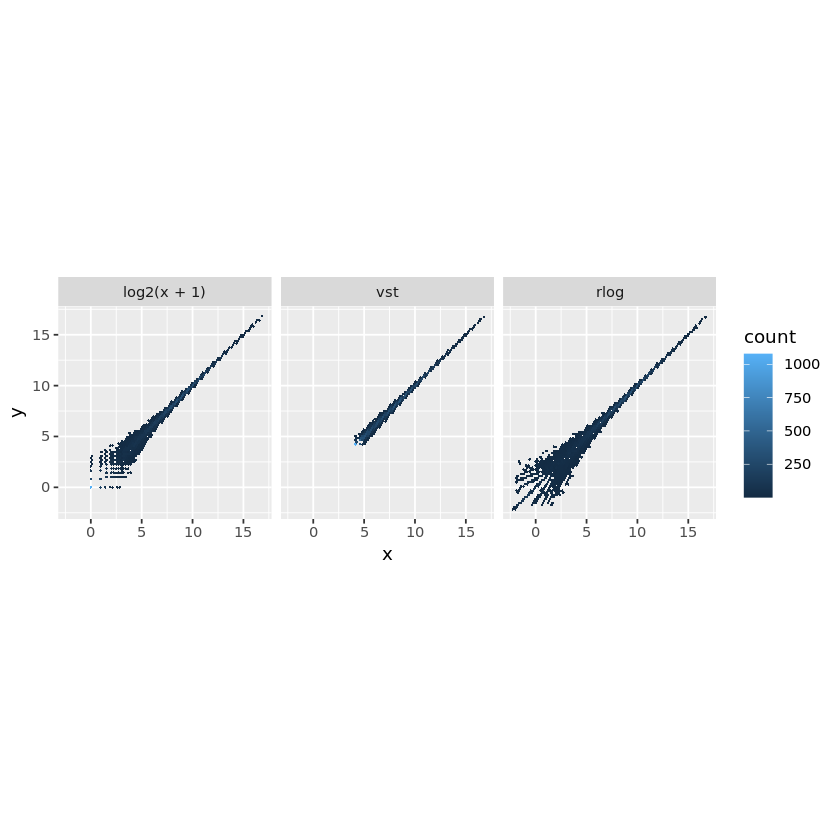

In [19]:
library("dplyr")
library("ggplot2")

dds_comb <- estimateSizeFactors(dds_comb)

df <- bind_rows(
  as_data_frame(log2(counts(dds_comb, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

Re-run this with different gene QC filters to change variance.

In [20]:
# calc euclidian distances

sampleDists <- dist(t(assay(vsd)))
sampleDists


           SRR6396793 SRR6396794 SRR6396795 SRR6396796 SRR6396797 SRR6396798
SRR6396794   23.01506                                                       
SRR6396795   49.57039   49.77612                                            
SRR6396796   53.91581   53.92649   31.93100                                 
SRR6396797   36.73324   37.01796   39.52525   47.60886                      
SRR6396798   44.01282   44.04783   40.29722   46.35574   33.14201           
SRR6396799  311.23437  311.65945  324.44890  325.23583  315.49000  320.59232
SRR6396800  311.04452  311.46474  324.25771  325.03455  315.31057  320.40026
SRR6396801  314.29507  314.70788  327.10909  328.12843  318.03858  323.13553
SRR6396802  320.18709  320.62322  333.55977  334.54066  324.02490  329.40768
SRR6396803  323.92759  324.35974  337.48143  338.42431  327.86696  333.30051
SRR1170487  316.24787  316.72444  326.15211  328.54779  318.08390  323.12581
SRR1170488  316.73340  317.20442  326.64622  328.97538  318.56476  323.61400

In [22]:
library("pheatmap")
library("RColorBrewer")

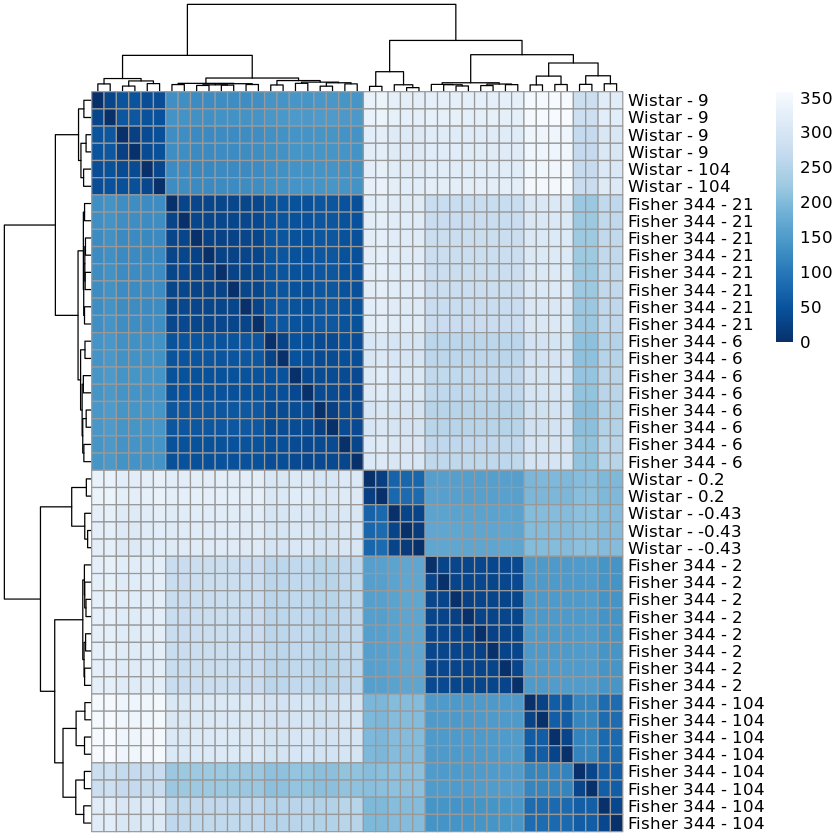

In [24]:
#headmap of sample distance based on VSD transformation

sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- paste( vsd$strain, vsd$age_week, sep = " - " )
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

In [25]:
# heatmap of sample based on Poisson distance

library("PoiClaClu")
poisd <- PoissonDistance(t(counts(dds_comb)))

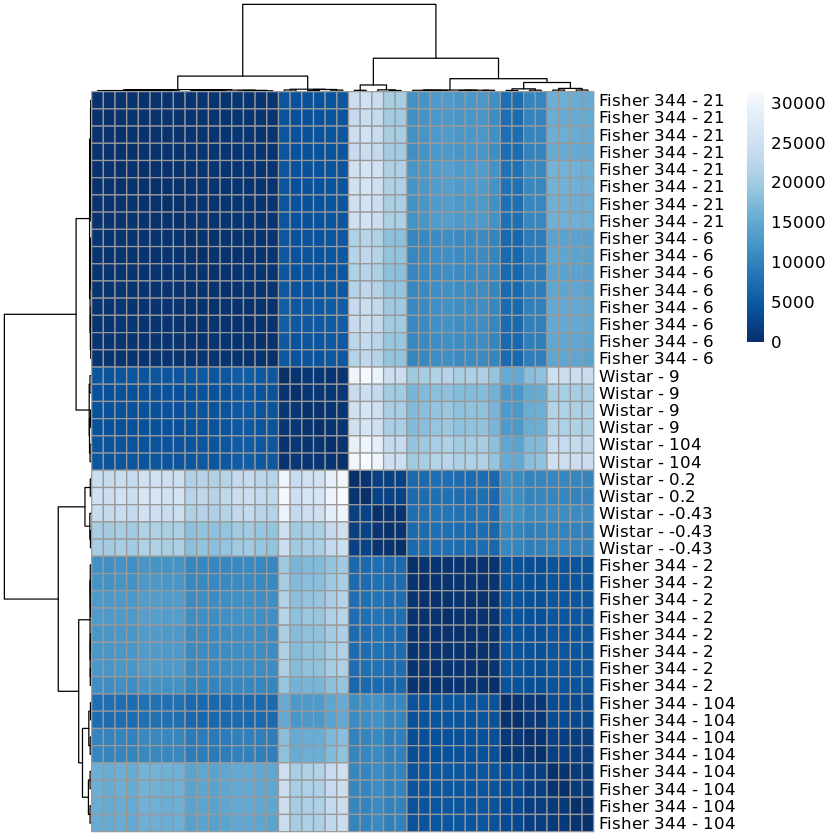

In [27]:
samplePoisDistMatrix <- as.matrix( poisd$dd )
rownames(samplePoisDistMatrix) <- paste( dds_comb$strain, dds_comb$age_week, sep=" - " )
colnames(samplePoisDistMatrix) <- NULL
pheatmap(samplePoisDistMatrix,
         clustering_distance_rows = poisd$dd,
         clustering_distance_cols = poisd$dd,
         col = colors)

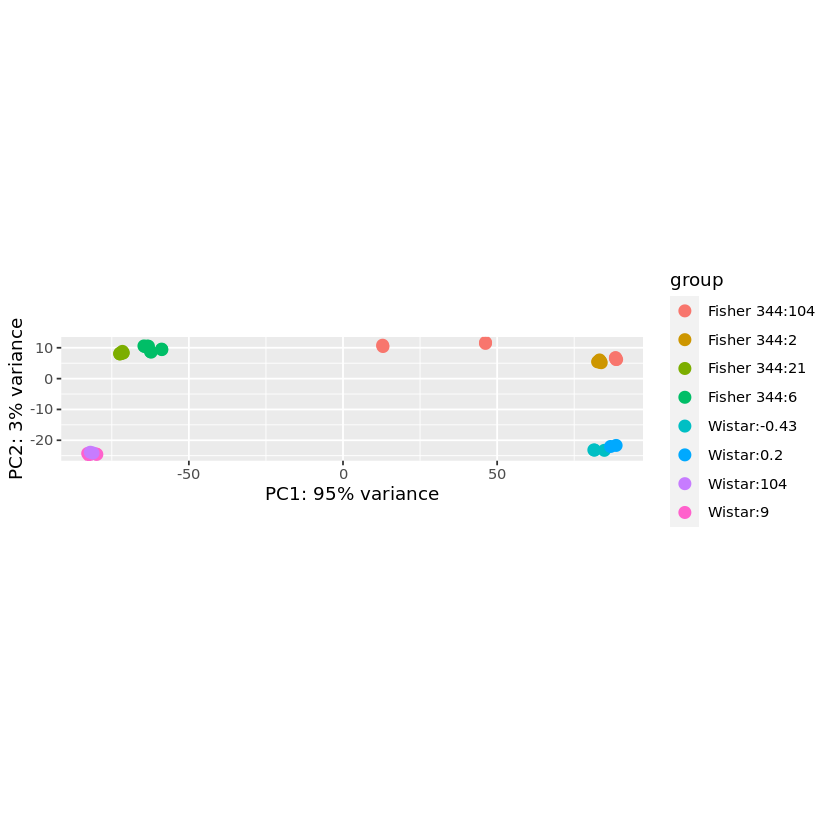

In [28]:
#PCA with VST data

plotPCA(vsd, intgroup = c("strain", "age_week"))

In [ ]:
# https://bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#exploratory-analysis-and-visualization #